# Mapping Narrative in *Aeneid* 1, 9, and 10

In [2]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.lines as mlines
import csv
from pylab import rcParams
rcParams['figure.figsize'] = (8,6)
epilocs = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/maticic-del-dm3769/AeneidPlacesFinalProject/AeneidPlacesSpreadsheet.csv")
pleiades = pd.read_csv("https://raw.githubusercontent.com/isaw-ga-3024/isaw-ga-3024.github.io/master/maticic-del-dm3769/AeneidPlacesFinalProject/pleiades-places.csv")
conn = sqlite3.connect(':memory:')
epilocs.to_sql('epilocs', conn, if_exists='replace')
pleiades.to_sql('pleiades', conn, if_exists='replace')

In [3]:
#Creating dataframes for all the Aeneid places
allaen = pd.read_sql("""SELECT epilocs.name, epilocs.place_type, epilocs.book, epilocs.line, epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.poem = 'Aeneid')
ORDER BY epilocs.book, epilocs.line""", conn)
allaencounts = allaen.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#Iliad places
ili = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.line, epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.poem = 'Iliad')
ORDER BY epilocs.book, epilocs.line""", conn)
ilicounts = ili.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#places in Aeneid 1
aen1 = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.line, epilocs.aeneaspath, epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.book = 'Aeneid_1')
ORDER BY epilocs.book, epilocs.line""", conn)
aen1counts = aen1.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#places in the Shield of Aeneas
shield = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.line, epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.book = 'Aeneid_8')
ORDER BY epilocs.book, epilocs.line""", conn)
shieldcounts = shield.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#places in Aeneid 9
aen9 = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.line, epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.book = 'Aeneid_9')
ORDER BY epilocs.book, epilocs.line""", conn)
aen9counts = aen9.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#places in Aeneid 10
aen10 = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.aeneaspath, epilocs.line, epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.book = 'Aeneid_10')
ORDER BY epilocs.book, epilocs.line""", conn)
aen10counts = aen10.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#places in Aeneid 10 and Iliad 16
aenil = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.book, epilocs.line, epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.book = 'Aeneid_10') OR (epilocs.book = 'Iliad_16')
ORDER BY epilocs.book, epilocs.line""", conn)
aenilcounts = aenil.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#places in Aeneid 1 in Italy
aen1italy = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.line, 
epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.book = 'Aeneid_1') AND (epilocs.in_italy = 'Italy')
ORDER BY epilocs.book, epilocs.line""", conn)
aen1italycounts = aen1italy.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#places in Aeneid 9 in Italy
aen9italy = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.line, 
epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.book = 'Aeneid_9') AND (epilocs.in_italy = 'Italy')
ORDER BY epilocs.book, epilocs.line""", conn)
aen9italycounts = aen9italy.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

#places in Aeneid 10 in Italy
aen10italy = pd.read_sql("""SELECT epilocs.name, epilocs. place_type, epilocs.line, 
epilocs.direct_speech, epilocs.narrative_type, pleiades.reprLong, pleiades.reprLat
FROM epilocs, pleiades
WHERE (epilocs.pleiades_id = pleiades.id) AND (epilocs.book = 'Aeneid_10') AND (epilocs.in_italy = 'Italy')
ORDER BY epilocs.book, epilocs.line""", conn)
aen10italycounts = aen10italy.groupby(['reprLong', 'reprLat', 'Name']).size().reset_index().rename(columns={0:'count'})

In [26]:
#In my essay, I use these figures.
allaen.groupby('Place_Type').size()

Place_Type
Body_of_water       5
City/Settlement    91
Island             12
Mountain/Hill      13
Port                2
Region             42
River              14
dtype: int64

In [28]:
allaendistinct = pd.read_sql("""SELECT DISTINCT epilocs.name, epilocs. place_type
FROM epilocs
WHERE epilocs.poem = "Aeneid"
ORDER BY epilocs.book, epilocs.line""", conn)
allaendistinct.groupby('Place_Type').size()

Place_Type
Body_of_water       5
City/Settlement    38
Island              7
Mountain/Hill      10
Port                2
Region             10
River              11
dtype: int64

# Map of all the places in *Aeneid* 1, 9, 10, and on the Shield
These three books may serve as a sample of the distribution of place references in the poem.

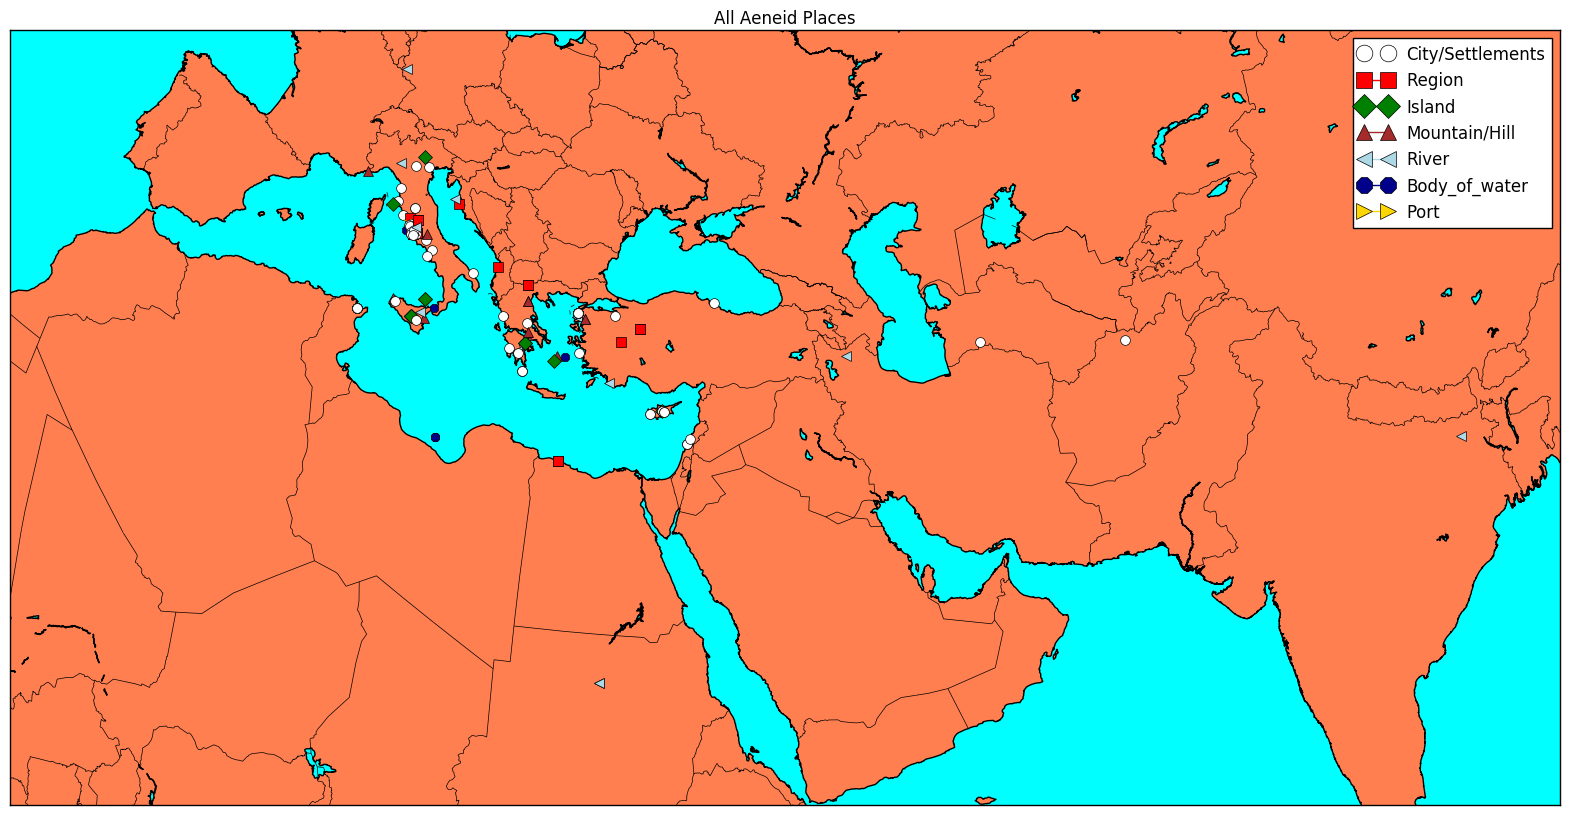

In [32]:
#The code for the maps after this one follow a similar pattern. I'll explain it here ere. 
# Here I'm creating a dataframe, 'allaenmap,' that will contain all the information concerning map 
#display such as the latitude and longitude covered and the resolution. Given the processing power of 
# my computer, I had to use intermediate resolution and, sometimes, higher thresh. 
allaenmap = Basemap(projection='cass', resolution = 'i', area_thresh = 500, lon_0 = 42, lat_0 = 35, width = 10000000, height = 5000000)
#Rather than create bins to load x and y coordinates in, I am creating separate coordinates for each 
#map I produce. 
#The code for the maps after this one follow a similar pattern. I'll explain it here ere. 
# Here I'm creating a dataframe, 'allaenmap,' that will contain all the information concerning map 
#display such as the latitude and longitude covered and the resolution. Given the processing power of 
# my computer, I had to use intermediate resolution and, sometimes, higher thresh. 
allaenmap = Basemap(projection='cass', resolution = 'i', area_thresh = 500, lon_0 = 42, lat_0 = 35, width = 10000000, height = 5000000)
#Rather than create bins to load x and y coordinates in, I am creating separate coordinates for each 
#map I produce
x, y = allaenmap(allaen['reprLong'].values, allaen['reprLat'].values)
labels = allaen['Name']
type = allaen['Place_Type']
for t, x, y in zip(type, x, y): #Giving different shapes and colors to different land types
    if t == "City/Settlement":
        allaenmap.plot(x, y, marker='o', color='white', markersize=7)
    if t == "Region":
        allaenmap.plot(x, y, marker='s', color='red', markersize=7)
    if t == "Island":
        allaenmap.plot(x, y, marker='D', color='green', markersize=7)
    if t == "Mountain/Hill":
        allaenmap.plot(x, y, marker='^', color='brown', markersize=7)
    if t == "River":
        allaenmap.plot(x, y, marker='<', color='lightblue', markersize=7)
    if t == "Body_of_water":
        allaenmap.plot(x, y, marker='8', color='darkblue', markersize=7)
    if t == "Port":
        allaenmap.plot(x, y, marker='1', color='gold', markersize=7)
allaenmap.plot(x,y) #plotting map
allaenmap.drawcoastlines()
allaenmap.drawcountries()
allaenmap.fillcontinents(color='coral',lake_color='aqua')
allaenmap.drawmapboundary(fill_color='aqua')
plt.title("All Aeneid Places")
plt.gcf().set_size_inches(20,20)
plt.show()

#drawing a legend
white_circle = mlines.Line2D([], [], color='white', marker='o', markersize=12, label='City/Settlements')
red_square = mlines.Line2D([], [], color='red', marker='s', markersize=12, label='Region')
green_diamond = mlines.Line2D([], [], color='green', marker='D', markersize=12, label='Island')
brown_triangle_up = mlines.Line2D([], [], color='brown', marker='^', markersize=12, label='Mountain/Hill')
lightblue_arrow_left = mlines.Line2D([], [], color='lightblue', marker='<', markersize=12, label='River')
darkblue_octagon = mlines.Line2D([], [], color='darkblue', marker='8', markersize=12, label='Body_of_water')                        
gold_arrow_left = mlines.Line2D([], [], color='gold', marker='>', markersize=12, label='Port')
plt.legend(handles=[white_circle, red_square, green_diamond, brown_triangle_up, lightblue_arrow_left, darkblue_octagon, gold_arrow_left,])

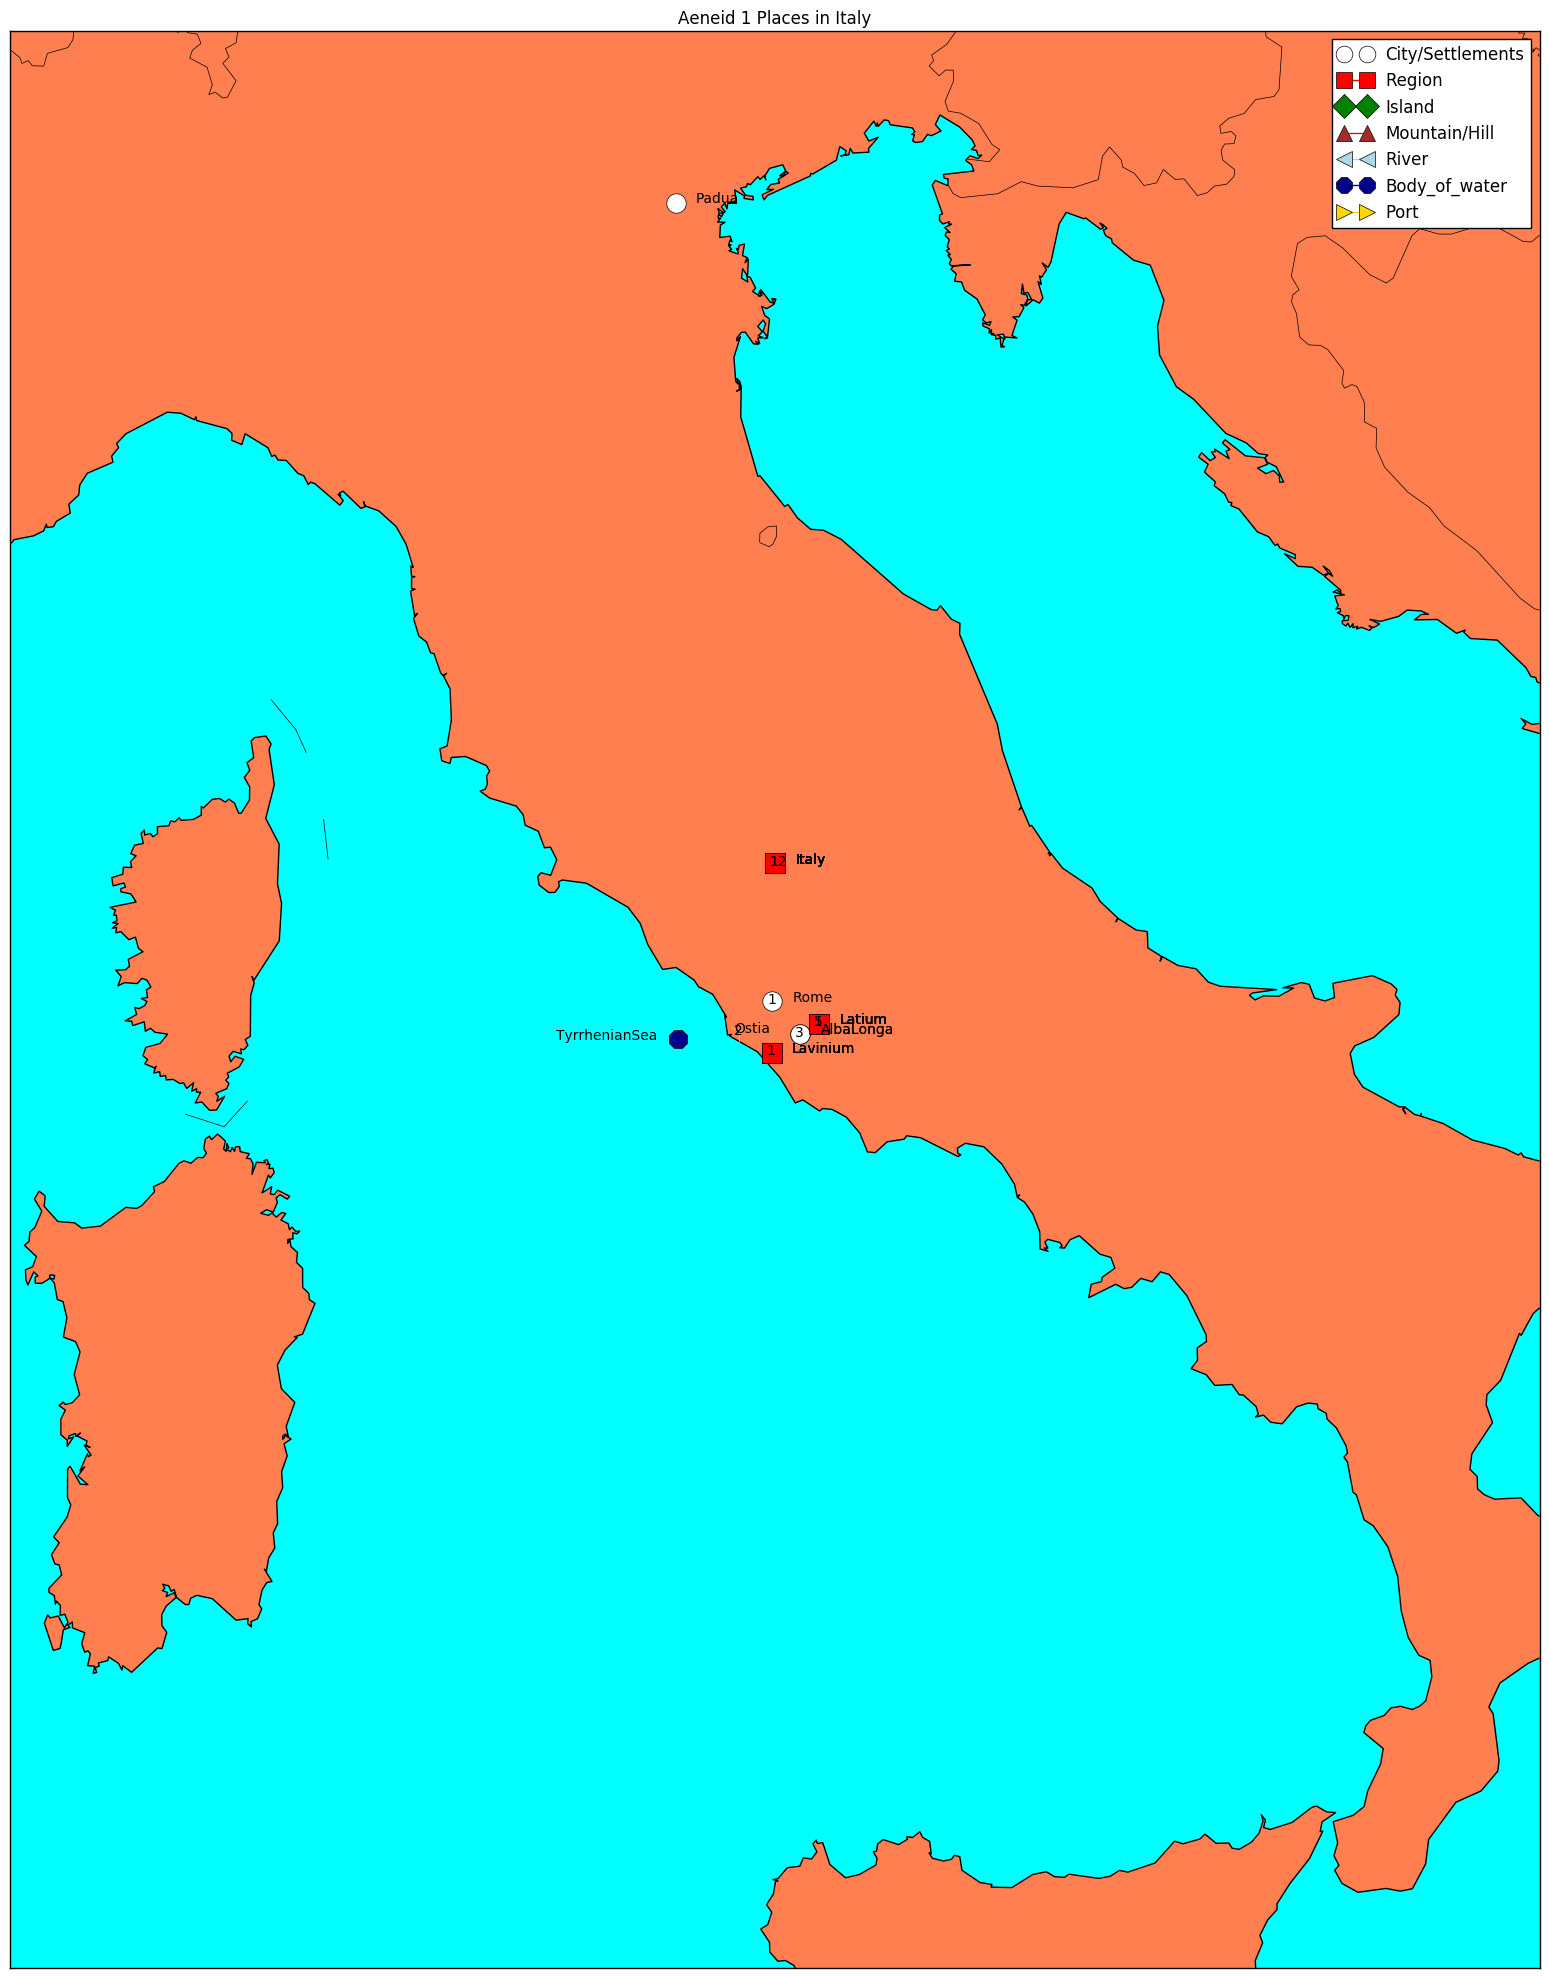

In [16]:
aen1italymap = Basemap(projection='cass', resolution = 'i', area_thresh = 500, lon_0 = 12.5, lat_0 = 41.9, width = 750000, height = 950000)
x, y = aen1italymap(aen1italy['reprLong'].values, aen1italy['reprLat'].values)
labels = aen1italy['Name']
type = aen1italy['Place_Type']
frequencies = aen1italycounts['count'] #where it can be visible on the map, I also include the number of references
for frequency, label, xpt, ypt in zip(frequencies, labels, x, y):
        plt.text(xpt-2700, ypt-1000, frequency)
for label, xpt, ypt in zip(labels, x, y):
    if label == 'TyrrhenianSea':
        plt.text(xpt-60000, ypt, label)
    elif label == 'Ostia': 
        plt.text(xpt-2500, ypt, label)
    else: 
        plt.text(xpt+10000, ypt, label)
for t, x, y in zip(type, x, y):
    if t == "City/Settlement":
        aen1italymap.plot(x, y, marker='o', color='white', markersize=14)
    elif t == "Region":
        aen1italymap.plot(x, y, marker='s', color='red', markersize=14)
    elif t == "Island":
        aen1italymap.plot(x, y, marker='D', color='green', markersize=14)
    elif t == "Mountain/Hill":
        aen1italymap.plot(x, y, marker='^', color='brown', markersize=14)
    elif t == "River":
        aen1italymap.plot(x, y, marker='<', color='lightblue', markersize=14)
    elif t == "Body_of_water":
        aen1italymap.plot(x, y, marker='8', color='darkblue', markersize=14)
    elif t == "Port":
        aen1italymap.plot(x, y, marker='1', color='gold', markersize=14) 
aen1italymap.plot(x, y)
aen1italymap.drawcoastlines()
aen1italymap.drawcountries()
aen1italymap.fillcontinents(color='coral',lake_color='aqua')
aen1italymap.drawmapboundary(fill_color='aqua')
plt.title("Aeneid 1 Places in Italy")
plt.gcf().set_size_inches(25,25)
plt.show()
blue_circle = mlines.Line2D([], [], color='blue', marker='o', markersize=12, label='City/Settlements')
red_square = mlines.Line2D([], [], color='red', marker='s', markersize=12, label='Region')
green_diamond = mlines.Line2D([], [], color='green', marker='D', markersize=12, label='Island')
blue_triangle_up = mlines.Line2D([], [], color='brown', marker='^', markersize=12, label='Mountain/Hill')
blue_arrow_left = mlines.Line2D([], [], color='lightblue', marker='<', markersize=12, label='River')
blue_octagon = mlines.Line2D([], [], color='darkblue', marker='8', markersize=12, label='Body of Water')
blue_tri_down = mlines.Line2D([], [], color='gold', marker='1', markersize=12, label='Port')
plt.legend(handles=[white_circle, red_square, green_diamond, brown_triangle_up, lightblue_arrow_left, darkblue_octagon, gold_arrow_left])

# Map of *Aeneid* 9, with closeup on Italy
Unsurprisingly, we find many more mention of Italian localities. 

There are a couple notable preliminary points to be made about the place names in this book. Firstly, there are noteably few (27) when compared with 1 (85) and 10 (57). Book 9 is a bit shorter than the other two, and this may have something to do with it. But it is tempting to coorelate the number of place names with the rare absence of Aeneas, who is on a mission to Evander and the Etruscans. But the most curious part of this map is rather the reference to the Ganges, which is the only time in the three books of the Aeneid surveyed here where a place of such great distance from the Mediterranean is mentioned. 

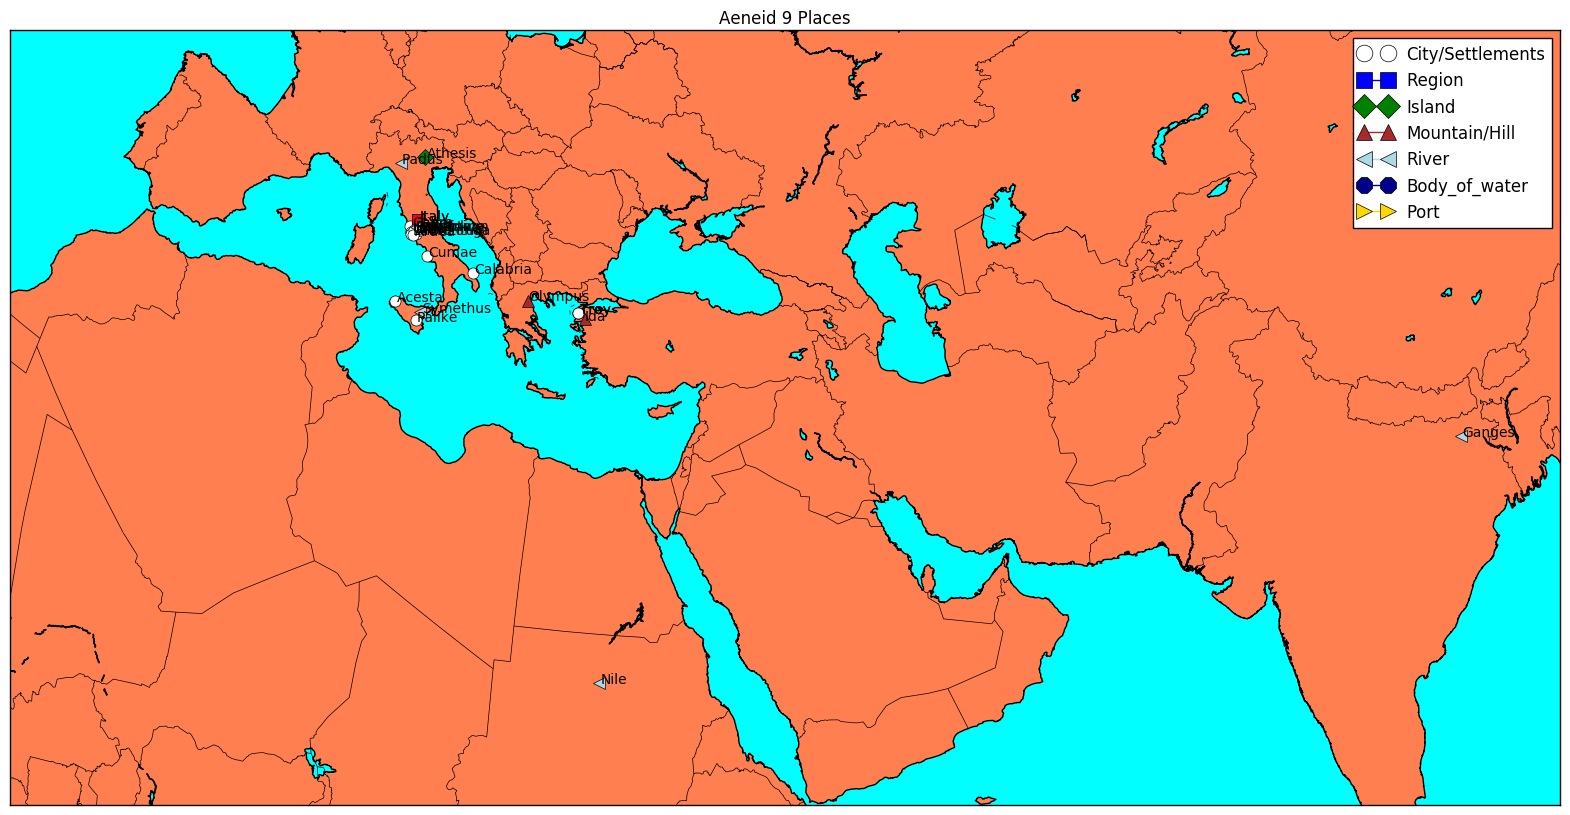

In [21]:
aeneid9map = Basemap(projection='cass', resolution = 'i', area_thresh = 1000, lon_0 = 42, lat_0 = 35, width = 10000000, height = 5000000)
x, y = aeneid9map(aen9['reprLong'].values, aen9['reprLat'].values)
labels = aen9['Name']
type = aen9['Place_Type']
frequencies = aen9counts['count']
for label, xpt, ypt in zip(labels, x, y):
    if label == 'TyrrhenianSea':
        plt.text(xpt-60000, ypt, label)
    elif label == 'Ostia': 
        plt.text(xpt-2500, ypt, label)
    elif label == 'Palike': 
        plt.text(xpt, ypt-3000, label)
    elif label == 'Ida': 
        plt.text(xpt+1000, ypt-5000, label)
    elif label == 'Padus': 
        plt.text(xpt, ypt-1000, label)
    elif label == 'Olympus': 
        plt.text(xpt, ypt+1200, label)
    else: 
        plt.text(xpt+10000, ypt, label)
for t, x, y in zip(type, x, y):
    if t == "City/Settlement":
        aeneid9map.plot(x, y, marker='o', color='white', markersize=8)
    elif t == "Region":
        aeneid9map.plot(x, y, marker='s', color='red', markersize=8)
    elif t == "Island":
        aeneid9map.plot(x, y, marker='D', color='green', markersize=8)
    elif t == "Mountain/Hill":
        aeneid9map.plot(x, y, marker='^', color='brown', markersize=8)
    elif t == "River":
        aeneid9map.plot(x, y, marker='<', color='lightblue', markersize=8)
    elif t == "Body_of_water":
        aeneid9map.plot(x, y, marker='8', color='darkblue', markersize=8)
    elif t == "Port":
        aeneid9map.plot(x, y, marker='1', color='gold', markersize=8) 
aeneid9map.plot(x, y)
aeneid9map.drawcoastlines()
aeneid9map.drawcountries()
aeneid9map.fillcontinents(color='coral',lake_color='aqua')
aeneid9map.drawmapboundary(fill_color='aqua')
plt.title("Aeneid 9 Places")
plt.gcf().set_size_inches(20,20)
plt.show()
white_circle = mlines.Line2D([], [], color='white', marker='o', markersize=12, label='City/Settlements')
red_square = mlines.Line2D([], [], color='red', marker='s', markersize=12, label='Region')
green_diamond = mlines.Line2D([], [], color='green', marker='D', markersize=12, label='Island')
brown_triangle_up = mlines.Line2D([], [], color='brown', marker='^', markersize=12, label='Mountain/Hill')
lightblue_arrow_left = mlines.Line2D([], [], color='lightblue', marker='<', markersize=12, label='River')
darkblue_octagon = mlines.Line2D([], [], color='darkblue', marker='8', markersize=12, label='Body_of_water')                        
gold_arrow_left = mlines.Line2D([], [], color='gold', marker='>', markersize=12, label='Port')
plt.legend(handles=[white_circle, blue_square, green_diamond, brown_triangle_up, lightblue_arrow_left, darkblue_octagon, gold_arrow_left,])

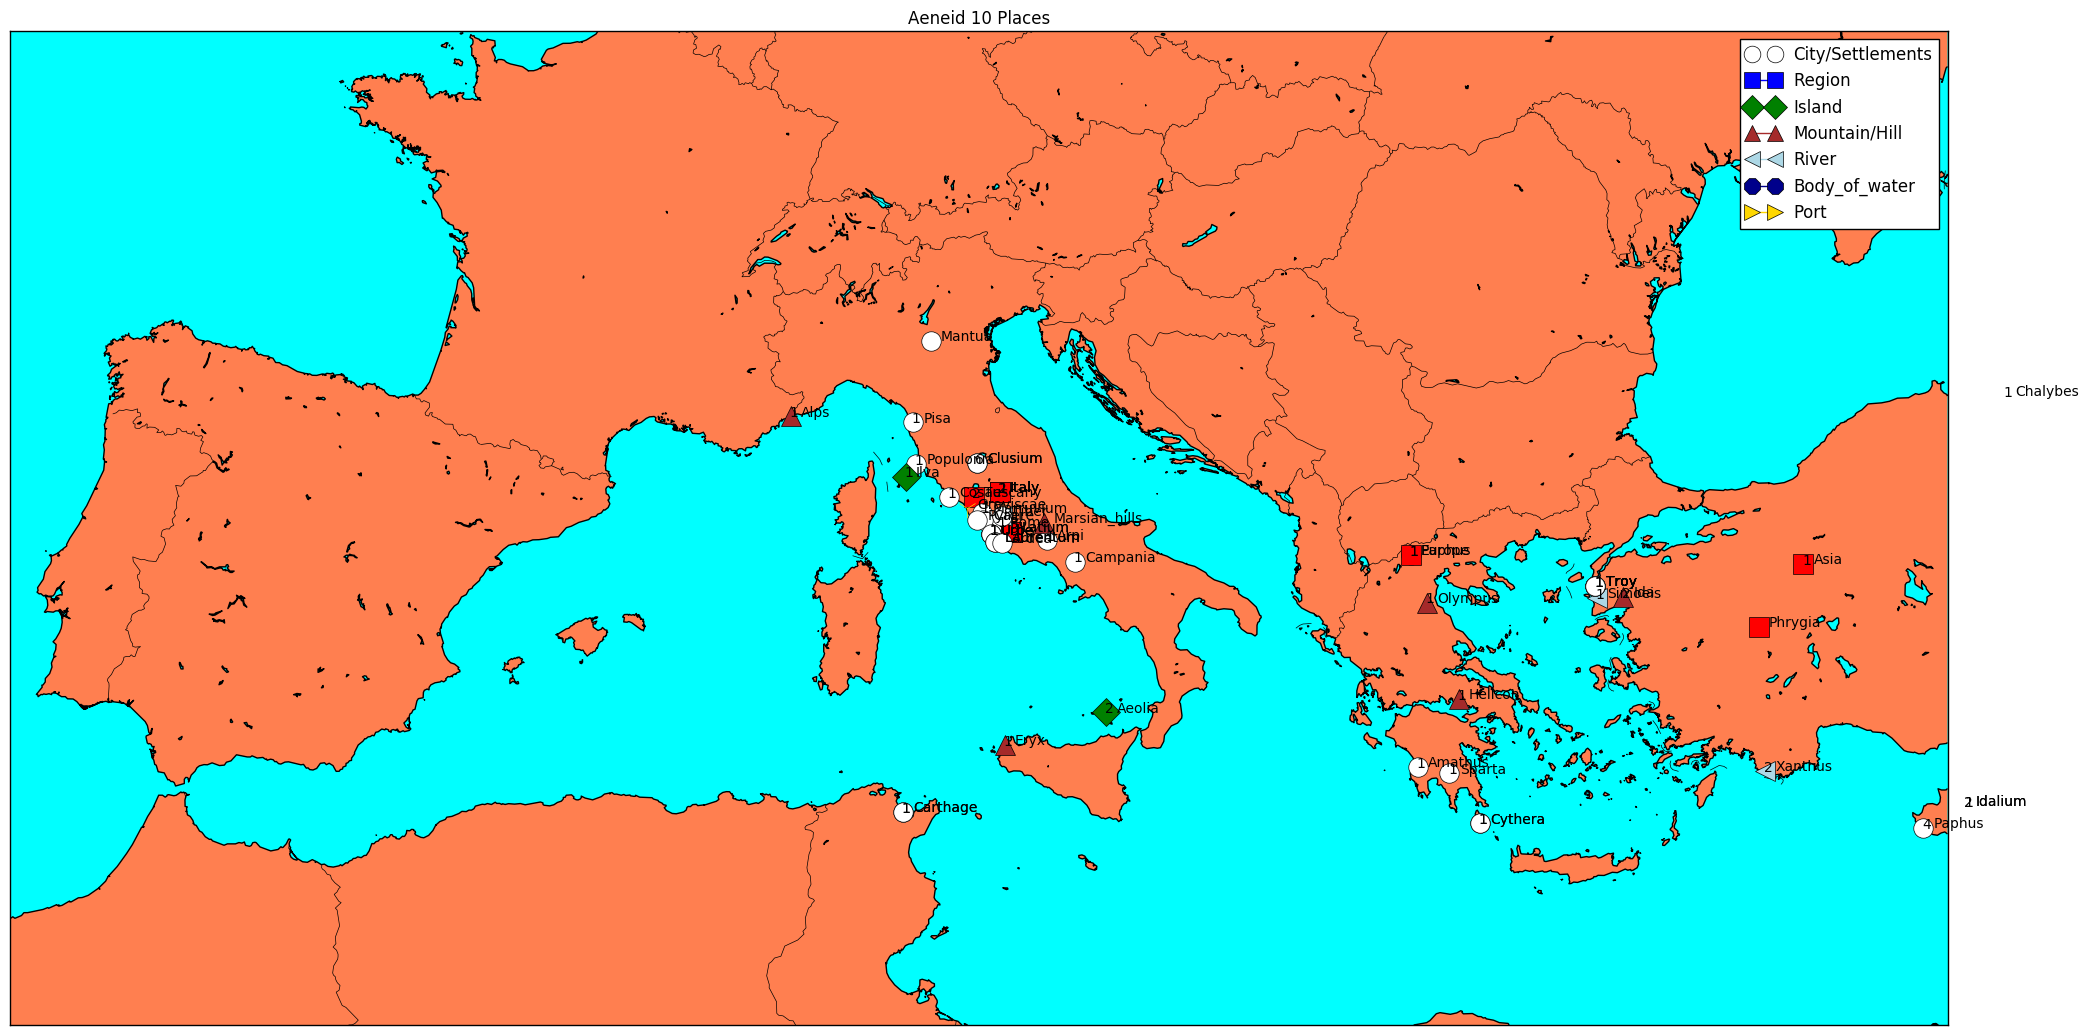

In [22]:
aen10map = Basemap(projection='cass', resolution = 'i', area_thresh = 500, lon_0 = 12, lat_0 = 41.87, width = 3800000, height = 1950000)
x, y = aen10map(aen10['reprLong'].values, aen10['reprLat'].values)
labels = aen10['Name']
type = aen10['Place_Type']
frequencies = aen10counts['count']
for frequency, label, xpt, ypt in zip(frequencies, labels, x, y):
        plt.text(xpt-2700, ypt-1000, frequency)
for label, xpt, ypt in zip(labels, x, y):
        plt.text(xpt+20000, ypt, label)
for t, x, y in zip(type, x, y):
    if t == "City/Settlement":
        aen10map.plot(x, y, marker='o', color='white', markersize=14)
    elif t == "Region":
        aen10map.plot(x, y, marker='s', color='red', markersize=14)
    elif t == "Island":
        aen10map.plot(x, y, marker='D', color='green', markersize=14)
    elif t == "Mountain/Hill":
        aen10map.plot(x, y, marker='^', color='brown', markersize=14)
    elif t == "River":
        aen10map.plot(x, y, marker='<', color='lightblue', markersize=14)
    elif t == "Body_of_water":
        aen10map.plot(x, y, marker='8', color='darkblue', markersize=14)
    elif t == "Port":
        aen10map.plot(x, y, marker='1', color='gold', markersize=14) 
aen10map.plot(x, y, 'o', color='white', markersize=14)
aen10map.drawcoastlines()
aen10map.drawcountries()
aen10map.fillcontinents(color='coral',lake_color='aqua')
aen10map.drawmapboundary(fill_color='aqua')
plt.title("Aeneid 10 Places")
plt.gcf().set_size_inches(25,25)
plt.show()
white_circle = mlines.Line2D([], [], color='white', marker='o', markersize=12, label='City/Settlements')
red_square = mlines.Line2D([], [], color='red', marker='s', markersize=12, label='Region')
green_diamond = mlines.Line2D([], [], color='green', marker='D', markersize=12, label='Island')
brown_triangle_up = mlines.Line2D([], [], color='brown', marker='^', markersize=12, label='Mountain/Hill')
lightblue_arrow_left = mlines.Line2D([], [], color='lightblue', marker='<', markersize=12, label='River')
darkblue_octagon = mlines.Line2D([], [], color='darkblue', marker='8', markersize=12, label='Body_of_water')                        
gold_arrow_left = mlines.Line2D([], [], color='gold', marker='>', markersize=12, label='Port')
plt.legend(handles=[white_circle, blue_square, green_diamond, brown_triangle_up, lightblue_arrow_left, darkblue_octagon, gold_arrow_left,])


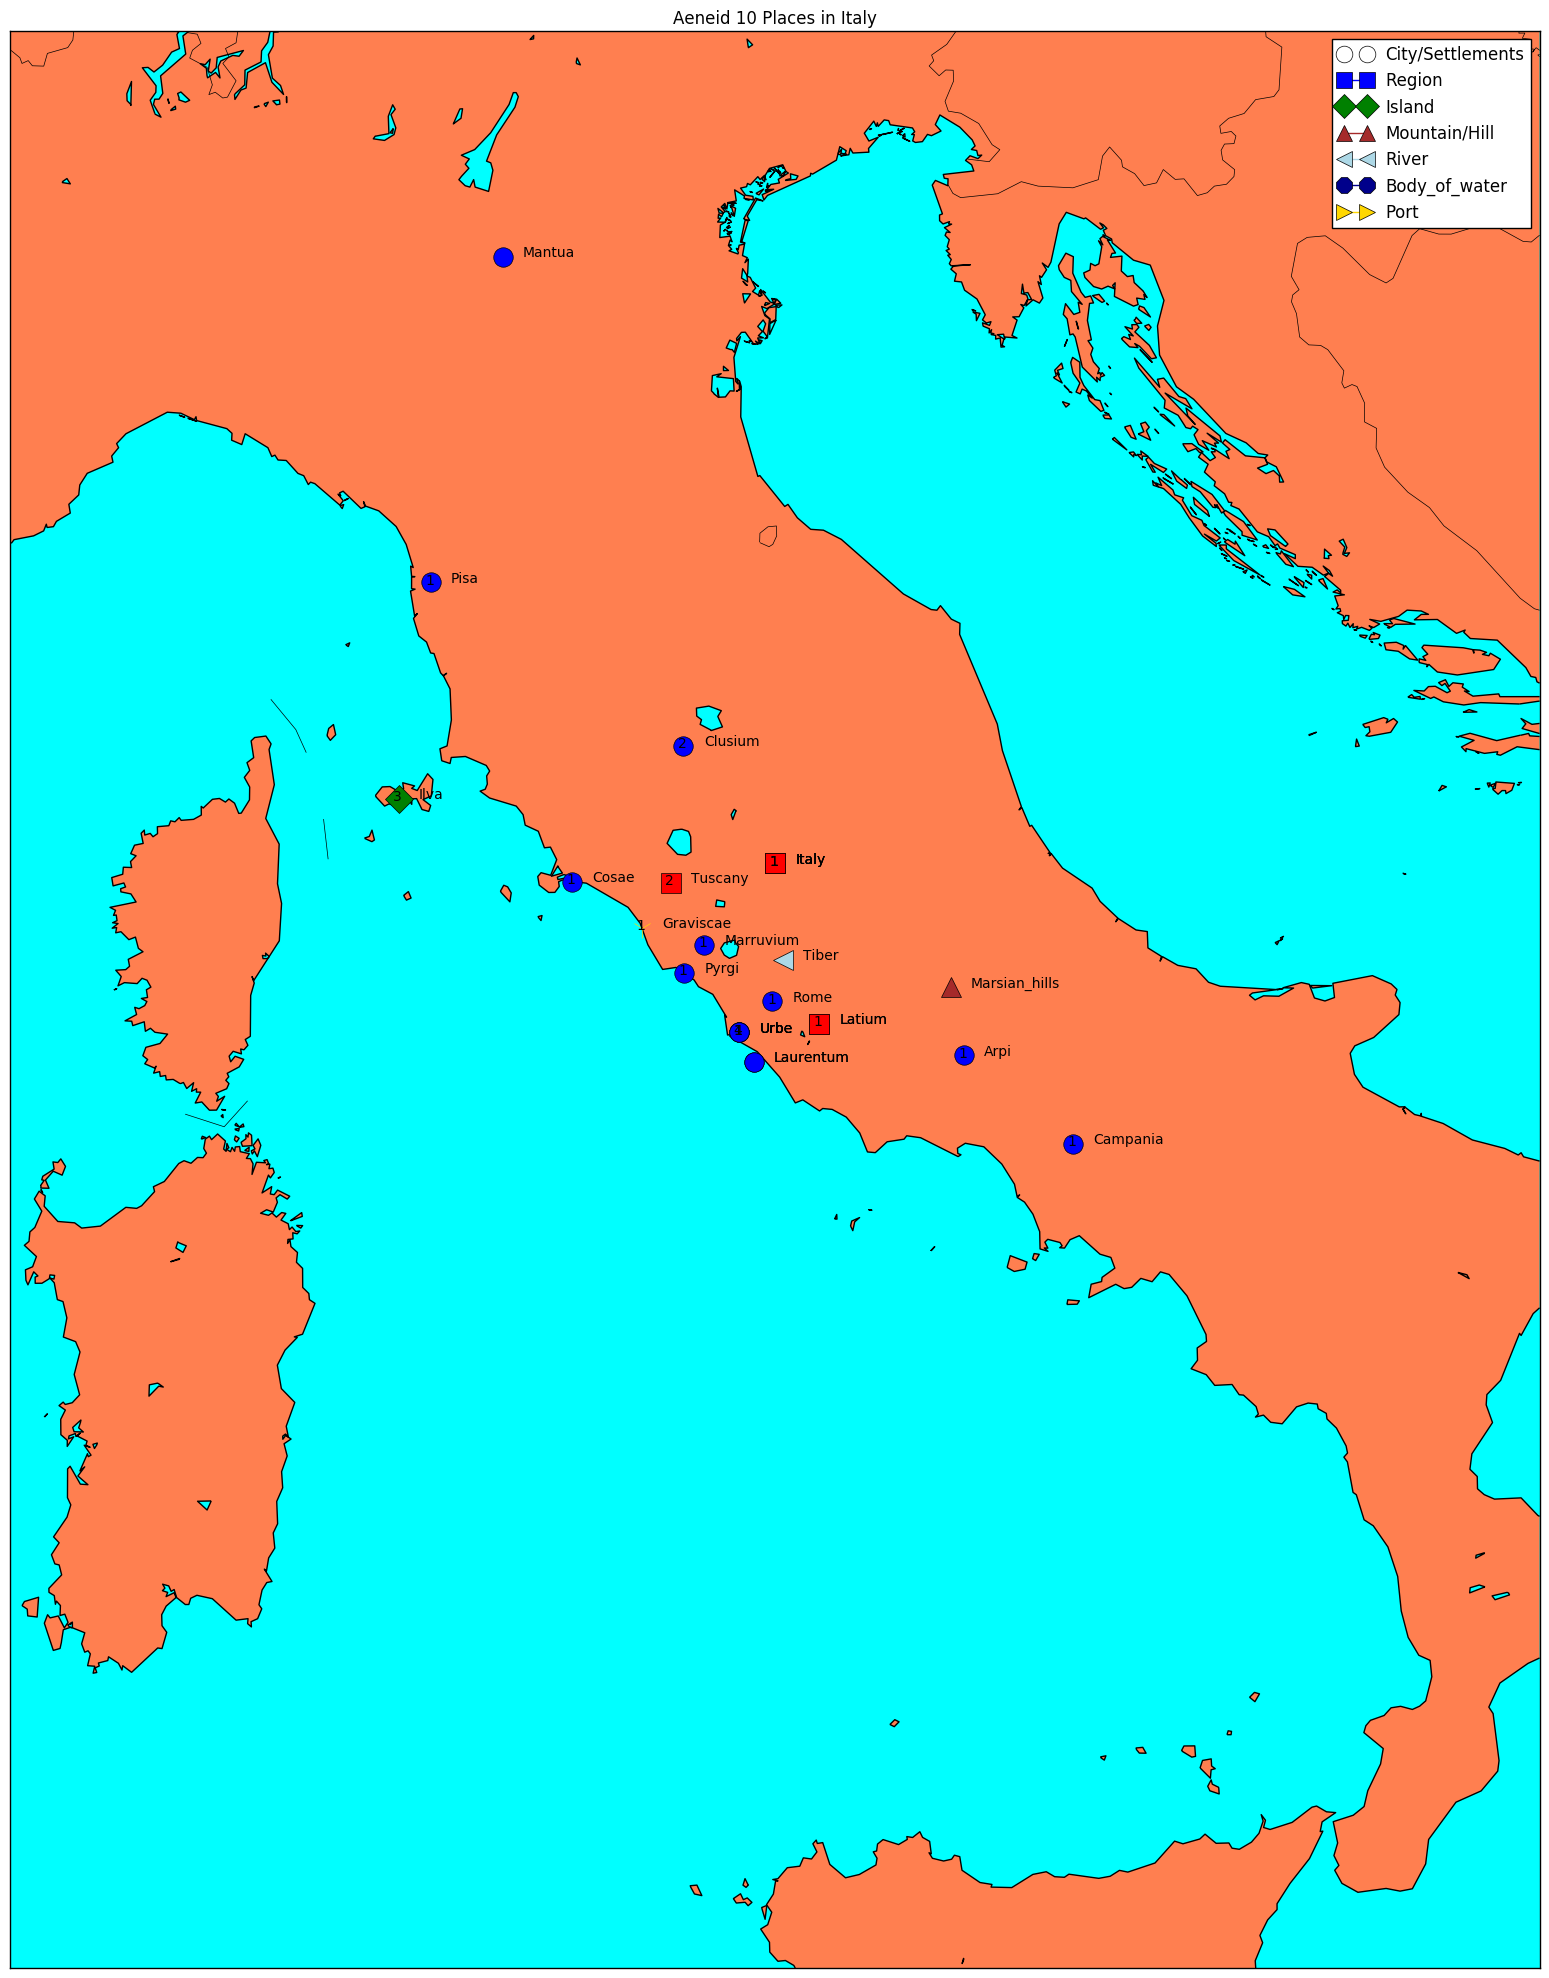

In [23]:
aen10italymap = Basemap(projection='cass', resolution = 'i', area_thresh = 0.1, lon_0 = 12.5, lat_0 = 41.9, width = 750000, height = 950000)
x, y = aen10italymap(aen10italy['reprLong'].values, aen10italy['reprLat'].values)
labels = aen10italy['Name']
type = aen10italy['Place_Type']
frequencies = aen10italycounts['count']
for frequency, label, xpt, ypt in zip(frequencies, labels, x, y):
        plt.text(xpt-2700, ypt-1000, frequency)
for label, xpt, ypt in zip(labels, x, y):
        plt.text(xpt+10000, ypt, label)
for t, x, y in zip(type, x, y):
    if t == "City/Settlement":
        aen10italymap.plot(x, y, marker='o', color='blue', markersize=14)
    elif t == "Region":
        aen10italymap.plot(x, y, marker='s', color='red', markersize=14)
    elif t == "Island":
        aen10italymap.plot(x, y, marker='D', color='green', markersize=14)
    elif t == "Mountain/Hill":
        aen10italymap.plot(x, y, marker='^', color='brown', markersize=14)
    elif t == "River":
        aen10italymap.plot(x, y, marker='<', color='lightblue', markersize=14)
    elif t == "Body_of_water":
        aen10italymap.plot(x, y, marker='8', color='darkblue', markersize=14)
    elif t == "Port":
        aen10italymap.plot(x, y, marker='1', color='gold', markersize=14) 
aen10italymap.plot(x, y)
aen10italymap.drawcoastlines()
aen10italymap.drawcountries()
aen10italymap.fillcontinents(color='coral',lake_color='aqua')
aen10italymap.drawmapboundary(fill_color='aqua')
plt.title("Aeneid 10 Places in Italy")
plt.gcf().set_size_inches(25,25)
plt.show()
white_circle = mlines.Line2D([], [], color='white', marker='o', markersize=12, label='City/Settlements')
red_square = mlines.Line2D([], [], color='red', marker='s', markersize=12, label='Region')
green_diamond = mlines.Line2D([], [], color='green', marker='D', markersize=12, label='Island')
brown_triangle_up = mlines.Line2D([], [], color='brown', marker='^', markersize=12, label='Mountain/Hill')
lightblue_arrow_left = mlines.Line2D([], [], color='lightblue', marker='<', markersize=12, label='River')
darkblue_octagon = mlines.Line2D([], [], color='darkblue', marker='8', markersize=12, label='Body_of_water')                        
gold_arrow_left = mlines.Line2D([], [], color='gold', marker='>', markersize=12, label='Port')
plt.legend(handles=[white_circle, blue_square, green_diamond, brown_triangle_up, lightblue_arrow_left, darkblue_octagon, gold_arrow_left,])

# Map of the Shield of Aeneas
Again, in the shield depiction, we see the sort of global vision that people expect from the "cosmic" epic poem about Rome in the world. Though it is interesting to note that the sort of macroscopic vision of the empire we see on the shield is in fact notably less common in the sample books we've surveyed.

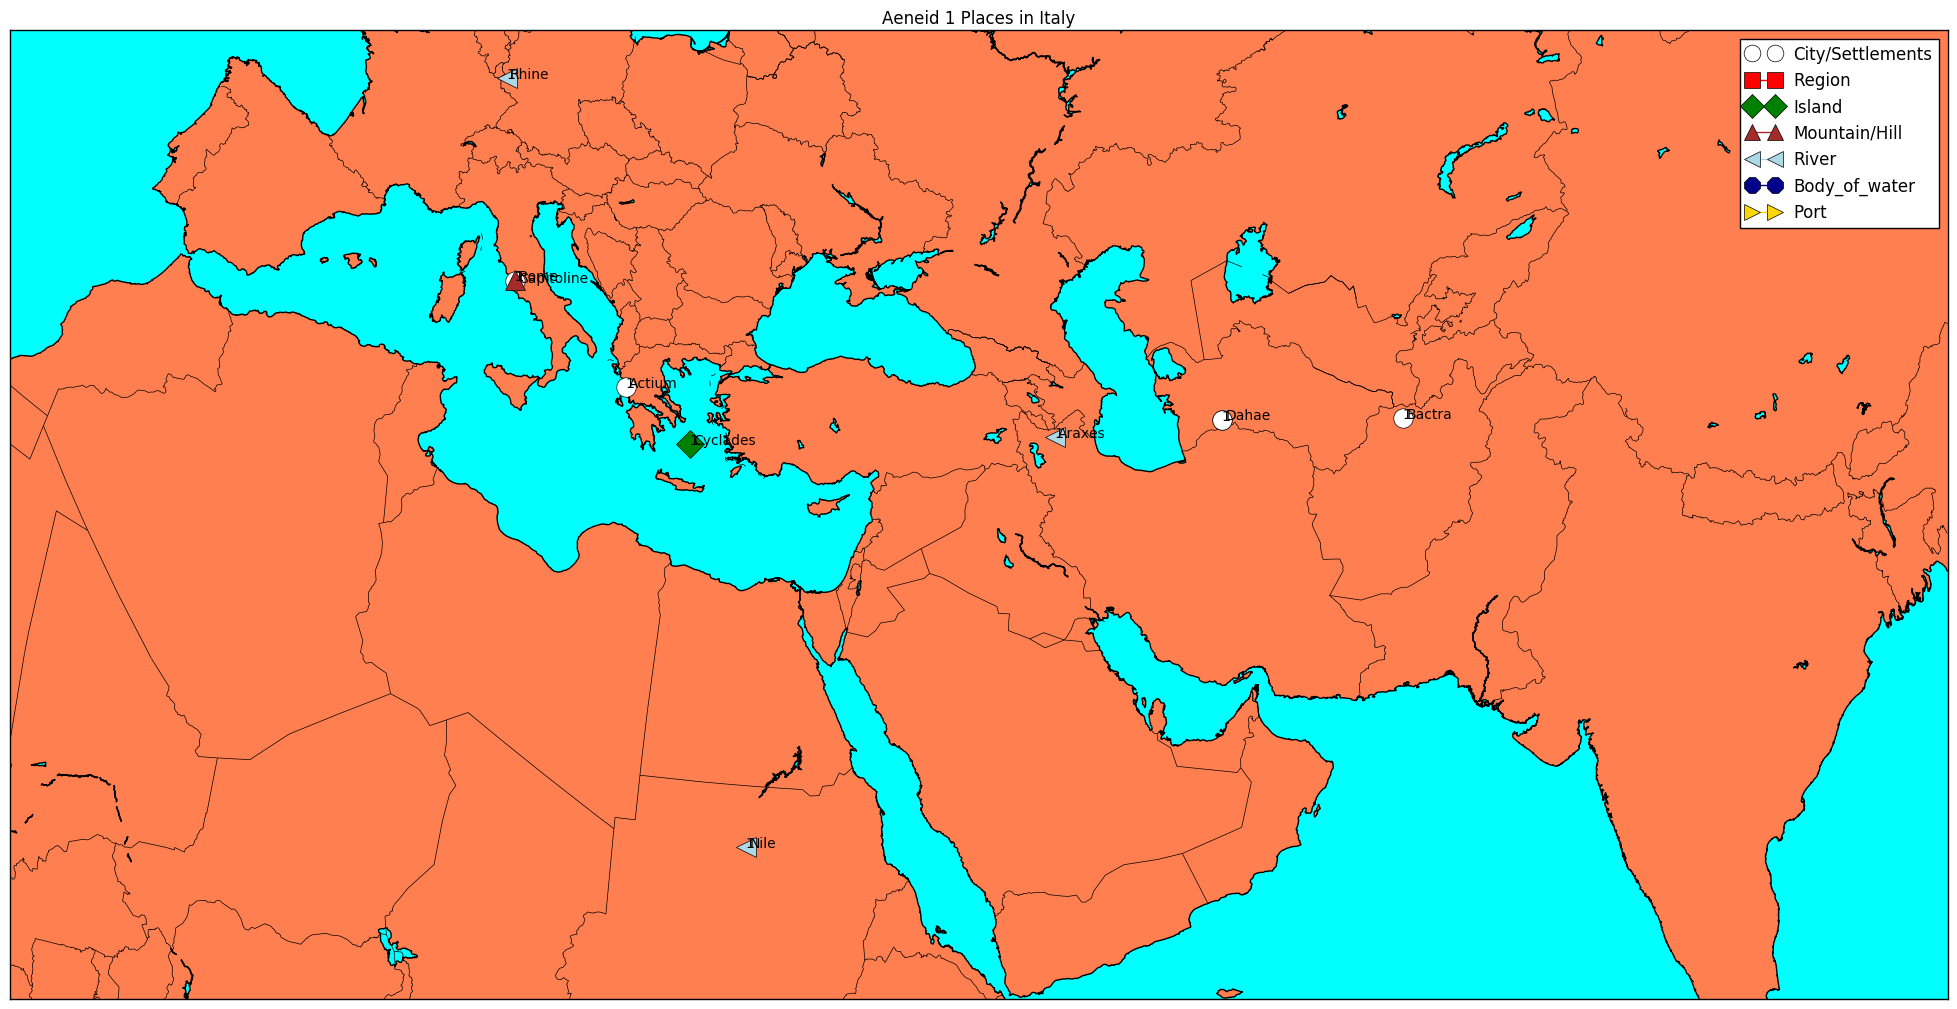

In [13]:
shieldmap = Basemap(projection='cass', resolution = 'i', area_thresh = 500, lon_0 = 42, lat_0 = 35, width = 10000000, height = 5000000)
x, y = shieldmap(shield['reprLong'].values, shield['reprLat'].values)
labels = shield['Name']
type = shield['Place_Type']
frequencies = shieldcounts['count']
for frequency, label, xpt, ypt in zip(frequencies, labels, x, y):
        plt.text(xpt-2700, ypt-1000, frequency)
for label, xpt, ypt in zip(labels, x, y):
    if label == 'Capitoline':
        plt.text(xpt+18000, ypt-10000, label)
    else: 
        plt.text(xpt+18000, ypt, label)
for t, x, y in zip(type, x, y):
    if t == "City/Settlement":
        shieldmap.plot(x, y, marker='o', color='white', markersize=14)
    elif t == "Region":
        shieldmap.plot(x, y, marker='s', color='red', markersize=14)
    elif t == "Island":
        shieldmap.plot(x, y, marker='D', color='green', markersize=14)
    elif t == "Mountain/Hill":
        shieldmap.plot(x, y, marker='^', color='brown', markersize=14)
    elif t == "River":
        shieldmap.plot(x, y, marker='<', color='lightblue', markersize=14)
    elif t == "Body_of_water":
        shieldmap.plot(x, y, marker='8', color='darkblue', markersize=14)
    elif t == "Port":
        shieldmap.plot(x, y, marker='1', color='gold', markersize=14) 
shieldmap.plot(x, y, 'o', color='white', markersize=14)
shieldmap.drawcoastlines()
shieldmap.drawcountries()
shieldmap.fillcontinents(color='coral',lake_color='aqua')
shieldmap.drawmapboundary(fill_color='aqua')
plt.title("Aeneid 1 Places in Italy")
plt.gcf().set_size_inches(25,25)
plt.show()
white_circle = mlines.Line2D([], [], color='white', marker='o', markersize=12, label='City/Settlements')
red_square = mlines.Line2D([], [], color='red', marker='s', markersize=12, label='Region')
green_diamond = mlines.Line2D([], [], color='green', marker='D', markersize=12, label='Island')
brown_triangle_up = mlines.Line2D([], [], color='brown', marker='^', markersize=12, label='Mountain/Hill')
lightblue_arrow_left = mlines.Line2D([], [], color='lightblue', marker='<', markersize=12, label='River')
darkblue_octagon = mlines.Line2D([], [], color='darkblue', marker='8', markersize=12, label='Body_of_water')                        
gold_arrow_left = mlines.Line2D([], [], color='gold', marker='>', markersize=12, label='Port')
plt.legend(handles=[white_circle, red_square, green_diamond, brown_triangle_up, lightblue_arrow_left, darkblue_octagon, gold_arrow_left,])

# Map of *Iliad* 16
Iliad 16, with much fewer place names and much smaller regional spread, may serve as a comparision with the Aeneid. It is worth noting that in the Iliad it is very common to mention peoples (e.g. the Phthians) in such a way as, it could be argued, metonymously stand for place in the poem. But these also occur in the Aeneid, and were counted here in neither case. 

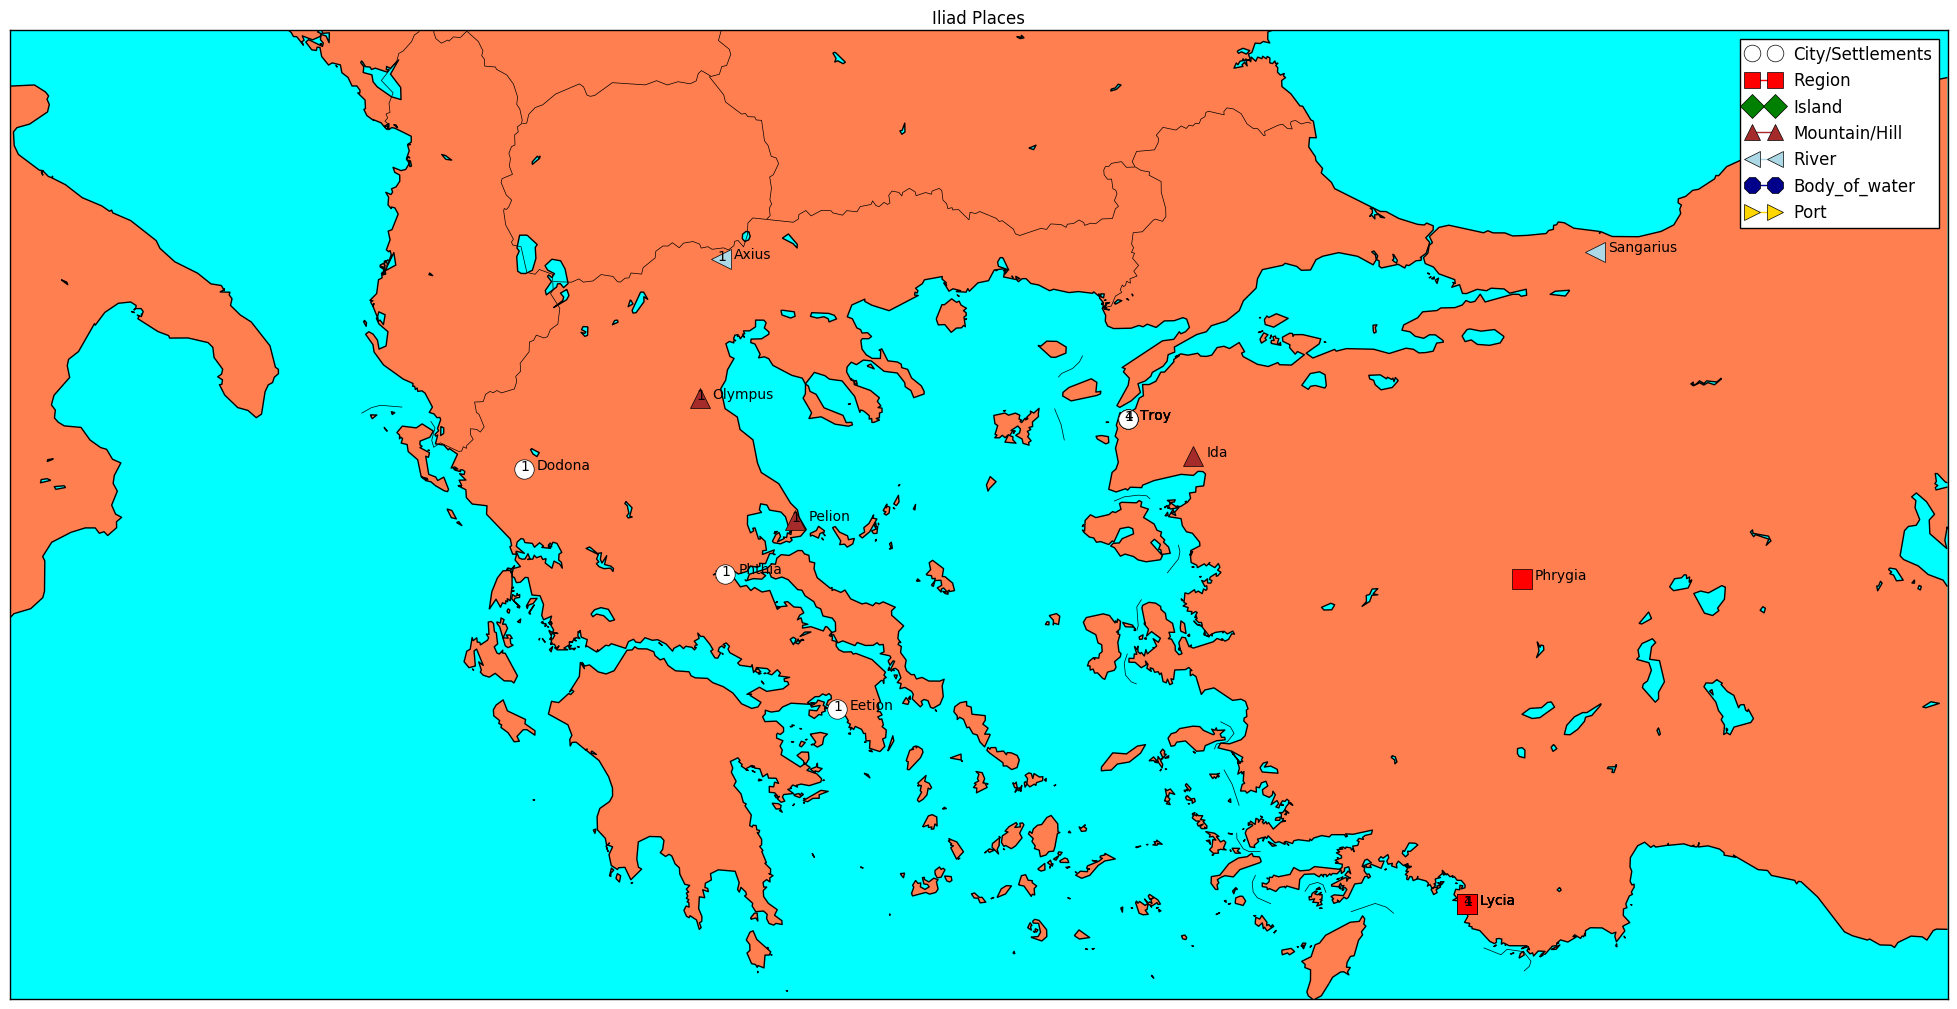

In [16]:
ilimap = Basemap(projection='cass', resolution = 'i', area_thresh = 0.1, lon_0 = 24.9, lat_0 = 39.3, width = 1500000, height = 750000)
x, y = ilimap(ili['reprLong'].values, ili['reprLat'].values)
labels = ili['Name']
type = ili['Place_Type']
frequencies = ilicounts['count']
for frequency, label, xpt, ypt in zip(frequencies, labels, x, y):
        plt.text(xpt-2700, ypt-1000, frequency)
for label, xpt, ypt in zip(labels, x, y):
        plt.text(xpt+10000, ypt, label)
for t, x, y in zip(type, x, y):
    if t == "City/Settlement":
        ilimap.plot(x, y, marker='o', color='white', markersize=14)
    elif t == "Region":
        ilimap.plot(x, y, marker='s', color='red', markersize=14)
    elif t == "Island":
        ilimap.plot(x, y, marker='D', color='green', markersize=14)
    elif t == "Mountain/Hill":
        ilimap.plot(x, y, marker='^', color='brown', markersize=14)
    elif t == "River":
        ilimap.plot(x, y, marker='<', color='lightblue', markersize=14)
    elif t == "Body_of_water":
        ilimap.plot(x, y, marker='8', color='darkblue', markersize=14)
    elif t == "Port":
        ilimap.plot(x, y, marker='1', color='gold', markersize=14) 
ilimap.plot(x, y)
ilimap.drawcoastlines()
ilimap.drawcountries()
ilimap.fillcontinents(color='coral',lake_color='aqua')
ilimap.drawmapboundary(fill_color='aqua')
plt.title("Iliad Places")
plt.gcf().set_size_inches(25,25)
plt.show()
white_circle = mlines.Line2D([], [], color='white', marker='o', markersize=12, label='City/Settlements')
red_square = mlines.Line2D([], [], color='red', marker='s', markersize=12, label='Region')
green_diamond = mlines.Line2D([], [], color='green', marker='D', markersize=12, label='Island')
brown_triangle_up = mlines.Line2D([], [], color='brown', marker='^', markersize=12, label='Mountain/Hill')
lightblue_arrow_left = mlines.Line2D([], [], color='lightblue', marker='<', markersize=12, label='River')
darkblue_octagon = mlines.Line2D([], [], color='darkblue', marker='8', markersize=12, label='Body_of_water')                        
gold_arrow_left = mlines.Line2D([], [], color='gold', marker='>', markersize=12, label='Port')
plt.legend(handles=[white_circle, red_square, green_diamond, brown_triangle_up, lightblue_arrow_left, darkblue_octagon, gold_arrow_left,])